In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
train_df = pd.read_csv('train_preprocessed.csv')
test_df = pd.read_csv('test_preprocessed.csv')

In [25]:
train_df.head()

,processed_text,label,emotion
0,feel intelligent insightful well,1,joy
1,like tea lot think reason want feel artistic,1,joy
2,feel poe tortured existence gained deep insight,3,anger
3,feel intelligent really prefer clear answer,1,joy
4,remember small child feeling frightened store ...,4,fear


In [26]:
test_df.head()

,processed_text,label,emotion
0,feel blessed able spend one semester teaching ...,1,joy
1,really hope good condition make hike left knee...,2,love
2,bet really good reason ever feeling doubtful t...,4,fear
3,sure normal pageant girl feeling sweet part bi...,1,joy
4,find stuff feel doubtful future,4,fear


In [27]:
# Prepare features and target
X_train = train_df['processed_text']
y_train = train_df['label']
X_test = test_df['processed_text']
y_test = test_df['label']

print("Training set size:", len(X_train))
print("Test set size:", len(X_test))

Training set size: 333447
Test set size: 83362


In [28]:
# Create pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('classifier', LogisticRegression(max_iter=1000, n_jobs=-1))
])

# Drop any rows with NaN values before training
X_train = X_train.dropna()
y_train = y_train[X_train.index]

# Train the model
pipeline.fit(X_train, y_train)

# Drop any NaN values from test set before prediction
X_test = X_test.dropna()
y_test = y_test[X_test.index]

# Make predictions 
y_pred = pipeline.predict(X_test)

In [29]:
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']))

Classification Report:
              precision    recall  f1-score   support

     sadness       0.94      0.94      0.94     24238
         joy       0.92      0.93      0.93     28212
        love       0.81      0.77      0.79      6911
       anger       0.90      0.90      0.90     11462
        fear       0.85      0.85      0.85      9542
    surprise       0.77      0.72      0.74      2994

    accuracy                           0.90     83359
   macro avg       0.87      0.85      0.86     83359
weighted avg       0.90      0.90      0.90     83359



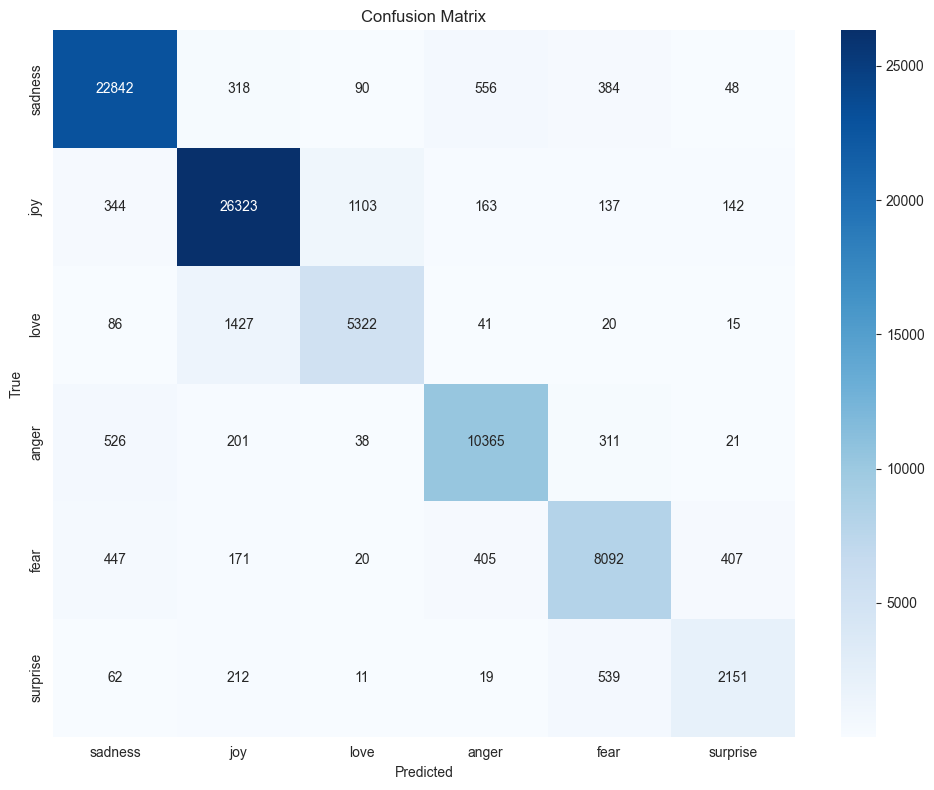

In [30]:
# Create confusion matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'],
            yticklabels=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()

In [31]:
def predict_emotion(text, pipeline):
    # Mapping for emotion labels
    emotion_map = {
        0: 'sadness',
        1: 'joy',
        2: 'love',
        3: 'anger',
        4: 'fear',
        5: 'surprise'
    }

    # Make prediction
    prediction = pipeline.predict([text])[0]

    return emotion_map[prediction]

# Test the function with some example texts
example_texts = [
    "I am so happy today!",
    "This makes me really angry",
    "I'm afraid of what might happen",
]

print("Example predictions:")
for text in example_texts:
    emotion = predict_emotion(text, pipeline)
    print(f"Text: {text}")
    print(f"Predicted emotion: {emotion}\n")

Example predictions:
Text: I am so happy today!
Predicted emotion: joy

Text: This makes me really angry
Predicted emotion: anger

Text: I'm afraid of what might happen
Predicted emotion: fear



In [32]:
import joblib

# Save the trained pipeline
joblib.dump(pipeline, 'emotion_classifier_model.joblib')
print("Model saved successfully!")

Model saved successfully!
